Import Library

In [226]:
import pandas as pd
import numpy as np
from sklearn.metrics import r2_score, accuracy_score

Membaca Dataset

In [227]:
data = pd.read_csv('income.csv')

Menampilkan Dataset

In [228]:
data

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,40,Self-emp-not-inc,223881,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,99999,0,70,United-States,>50K
1,30,Private,149118,HS-grad,9,Divorced,Craft-repair,Not-in-family,White,Female,0,0,40,United-States,<=50K
2,46,Private,109209,Some-college,10,Married-civ-spouse,Adm-clerical,Husband,White,Male,0,0,40,United-States,>50K
3,32,Private,229566,Assoc-voc,11,Married-civ-spouse,Other-service,Husband,White,Male,0,0,60,United-States,>50K
4,54,?,148657,Preschool,1,Married-civ-spouse,?,Wife,White,Female,0,0,40,Mexico,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24995,40,Private,130834,Some-college,10,Never-married,Adm-clerical,Not-in-family,White,Female,0,0,40,United-States,<=50K
24996,31,Local-gov,33124,Bachelors,13,Never-married,Prof-specialty,Not-in-family,White,Female,0,0,50,United-States,<=50K
24997,38,Federal-gov,190895,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,40,?,>50K
24998,23,Private,420973,Bachelors,13,Never-married,Prof-specialty,Not-in-family,White,Female,0,0,40,United-States,<=50K


Melakukan Datasplit Pada Dataset

Import Library Untuk Datasplit

In [229]:
from sklearn.model_selection import train_test_split

Memsubset Fitur Dan Target

In [230]:
X = data.iloc[:,:-1] 
y = data.iloc[:,-1]

Import Library Untuk Encoding

In [231]:
from sklearn.preprocessing import LabelEncoder

Mengubah Variabel 'Income' Menjadi 0 & 1

In [232]:
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

Data Split Dataset Menjadi Trainset dan Testset 

In [233]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

Data Cleaning Data Duplikat

Cek & Menampilkan data Duplikat Dalam Dataset

In [234]:
print("Jumlah Data Duplikat : ")
data.duplicated().sum()

Jumlah Data Duplikat : 


12

Hapus Data Duplikat Dengan Drop_Duplicates 

In [235]:
data.drop_duplicates(inplace=True)

Cek Kembali Data Duplikat

In [236]:
print("\nSetelah menggunakan fungsi drop_duplicates()")
print("Jumlah nilai Duplikat:", data.duplicated().sum())


Setelah menggunakan fungsi drop_duplicates()
Jumlah nilai Duplikat: 0


Memisahkan Kolom Numerik Dan Kategorikal

In [237]:
numeric_cols = [col for col in X_train.columns if X_train[col].dtype != 'object']
categorical_cols = [col for col in X_train.columns if X_train[col].dtype == 'object']

Menggunakan OneHotEncoder Untuk Kolom Kategorikal

Import Library OneHotEncoder

In [238]:
from sklearn.preprocessing import OneHotEncoder

Menggunakan OneHotEncoder Untuk Kolom Kategorikal

In [239]:
encoder = OneHotEncoder(sparse_output = False, handle_unknown = 'ignore')

Encode Kolom Kategorikal pada X_train dan X_test

In [240]:
X_train_encoded = encoder.fit_transform(X_train[categorical_cols])
X_test_encoded = encoder.transform(X_test[categorical_cols])

Konversi Dataset Menjadi Float32

In [241]:
X_train[numeric_cols] = X_train[numeric_cols].astype('float32')
X_test[numeric_cols] = X_test[numeric_cols].astype('float32')
y_train = y_train.astype('float32')
y_test = y_test.astype('float32')

Model Sequential

Import Library Keras

In [242]:
import tensorflow as tf
from tensorflow import keras

In [243]:
model = tf.keras.Sequential([
        tf.keras.layers.Dense(64, activation='relu', input_shape = (None, 101)),
        tf.keras.layers.Dense(32, activation='relu'),
        tf.keras.layers.Dense(1, activation='sigmoid')
])

Melihat Detail Parameter Setiap Layer

In [244]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_27 (Dense)            (None, None, 64)          6528      
                                                                 
 dense_28 (Dense)            (None, None, 32)          2080      
                                                                 
 dense_29 (Dense)            (None, None, 1)           33        
                                                                 
Total params: 8641 (33.75 KB)
Trainable params: 8641 (33.75 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Compile Model

In [245]:
model.compile(optimizer = 'sgd', loss = 'binary_crossentropy', metrics = ['accuracy'])

Menggunakan Callbacks

In [246]:
class MyCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('accuracy') > 0.83 and logs.get('val_accuracy') > 0.83):
            self.model.stop_training = True

Melatih Model 

In [247]:
call = MyCallback()
history = model.fit(X_train_encoded, 
          y_train,
          validation_split = 0.2,
          validation_data=(X_test_encoded, y_test),
          batch_size = 64,
          epochs = 10,
          verbose = 1,
          callbacks=[call]
        )

Epoch 1/10
  1/313 [..............................] - ETA: 3:40 - loss: 0.6853 - accuracy: 0.6250

313/313 [==============================] - 2s 4ms/step - loss: 0.5229 - accuracy: 0.7572 - val_loss: 0.4698 - val_accuracy: 0.7500
Epoch 2/10
313/313 [==============================] - 1s 3ms/step - loss: 0.4346 - accuracy: 0.7847 - val_loss: 0.4274 - val_accuracy: 0.8082
Epoch 3/10
313/313 [==============================] - 1s 3ms/step - loss: 0.4069 - accuracy: 0.8134 - val_loss: 0.4109 - val_accuracy: 0.8156
Epoch 4/10
313/313 [==============================] - 1s 3ms/step - loss: 0.3933 - accuracy: 0.8224 - val_loss: 0.4012 - val_accuracy: 0.8182
Epoch 5/10
313/313 [==============================] - 1s 3ms/step - loss: 0.3850 - accuracy: 0.8245 - val_loss: 0.3947 - val_accuracy: 0.8150
Epoch 6/10
313/313 [==============================] - 1s 3ms/step - loss: 0.3793 - accuracy: 0.8257 - val_loss: 0.3898 - val_accuracy: 0.8182
Epoch 7/10
313/313 [==============================] - 1s 3ms/step - loss: 0.3749 - accuracy: 0.8273 - val_loss: 0.3858 - val_accuracy: 0.8184
Epoch 8/10
313/31

Mengevaluasi Model

In [248]:
score = model.evaluate(X_test_encoded, y_test, verbose=1)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

  1/157 [..............................] - ETA: 5s - loss: 0.4588 - accuracy: 0.7500

157/157 [==============================] - 0s 2ms/step - loss: 0.3789 - accuracy: 0.8210
Test loss: 0.3788711130619049
Test accuracy: 0.8209999799728394


Grafik Model Loss & Model Accuracy

Import Library Untuk Grafik

In [249]:
from matplotlib import pyplot as plt

Menampilkan Grafik

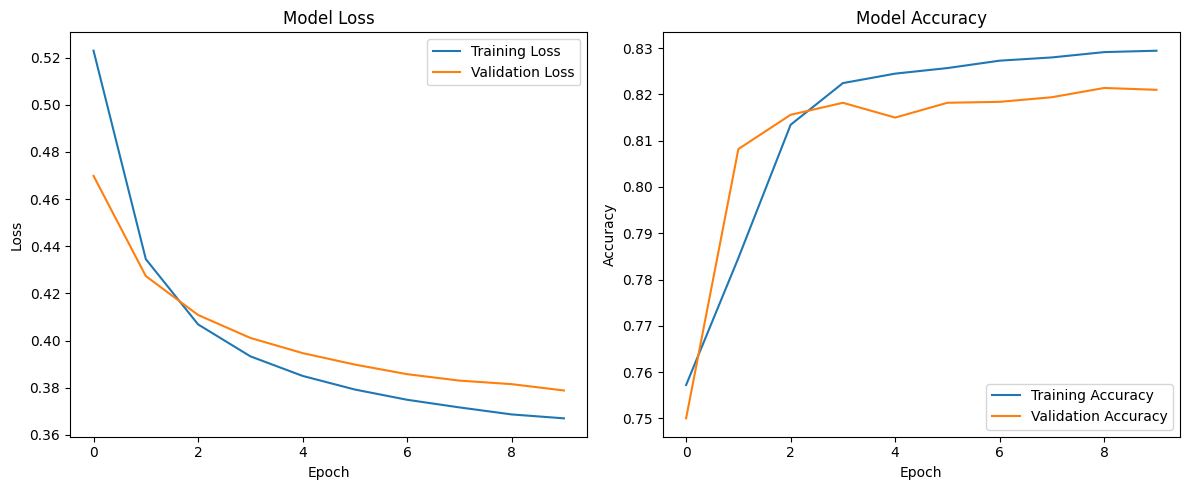

In [250]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Model Loss')

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Model Accuracy')

plt.tight_layout()
plt.show()